## Proyecto Zoo

#### Importar librerias

In [18]:
import numpy as np 
import pandas as pd 

#### Cargar datos de tabla Zoo y tabla Clases

In [2]:
zoo = pd.read_csv('/home/mata/mineria/proyecto/zoo-animal-classification/zoo.csv')
zooClass = pd.read_csv('/home/mata/mineria/proyecto/zoo-animal-classification/class.csv')

#### Encabezado de Zoo

In [3]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Verificando valores de tabla Zoo

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [14]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

#### Encabezado de clases

In [5]:
zooClass.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


#### Verificando valores de tabla class

In [6]:
zooClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Class_Number                         7 non-null int64
Number_Of_Animal_Species_In_Class    7 non-null int64
Class_Type                           7 non-null object
Animal_Names                         7 non-null object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


#### Unir Tablas zoo y class

In [10]:
unirTablas=pd.merge(zoo,zooClass,how='left',left_on='class_type',right_on='Class_Number')
unirTablas.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


#### Grafica para mostrar los animales totales con su determinado cantidad de patas, quise visualizar esto porque existe la decision de cambiar el registro por binario de 0,1 en lugar que se quede en decimal. Tiene que ver con la limpieza

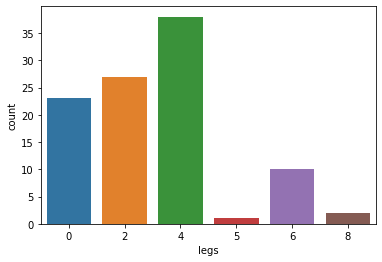

In [19]:
sns.countplot(unirTablas['legs'])